# Gold Price Prediction in India Using International Market Data (1971-2021)

### Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Importing the dataset

In [3]:
dataset = pd.read_csv('gold_prediction.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(x)

[[2.3370000e+02 1.4480000e+02 4.5160300e+04 ... 1.0823580e+05
  1.9720000e+02 1.9450000e+02]
 [2.5130000e+02 1.5460000e+02 5.0209100e+04 ... 1.1992930e+05
  2.1960000e+02 2.0940000e+02]
 [2.4010000e+02 1.4800000e+02 5.0274300e+04 ... 1.1612360e+05
  2.1460000e+02 2.0240000e+02]
 ...
 [1.9000000e+03 1.5540000e+03 2.0784500e+05 ... 2.1109394e+06
  2.4546000e+03 2.6067300e+04]
 [1.7632000e+03 1.4868000e+03 1.9569200e+05 ... 1.9855713e+06
  2.3485000e+03 2.5175600e+04]
 [1.8258000e+03 1.5397000e+03 2.0037610e+05 ... 2.1000689e+06
  2.4838000e+03 2.6708400e+04]]


In [5]:
print(y)

[  1840.8   2011.7   1940.2   2013.1   2253.4   2190.6   2354.1   2527.7
   3190.3   3142.6   3310.3   4189.6   5329.6   5138.1   4155.4   4155.2
   4152.3   5150.4   4813.2   4903.6   5211.3   4911.2   4871.9   4620.3
   4123.2   4082.9   4240.5   3998.5   4046.5   3703.8   3655.1   3820.1
   3870.4   3876.4   3815.    3625.1   3546.    3373.9   2987.6   3322.1
   3072.3   2971.9   3265.4   3933.3   3824.8   4108.4   4127.6   4320.
   5003.5   4197.    4104.3   4286.4   4391.8   4183.6   4291.    4219.7
   4123.3   3923.5   4218.6   3995.    4002.4   4220.1   4169.1   4094.2
   4218.3   4178.2   3919.9   4007.9   4140.    4017.    4016.    3825.9
   3834.8   3783.1   4001.6   3994.6   3857.    3874.7   3901.3   3974.
   3826.2   3899.9   3861.2   3920.6   4329.    4172.4   4172.5   4206.1
   4364.7   4276.4   4468.9   4778.8   5376.9   5187.4   5069.3   5061.
   5264.7   5202.4   5419.5   5734.5   5758.3   5727.8   5938.2   5870.5
   5954.3   6078.5   6230.4   6116.9   6056.5   5501.9

### Taking care of missing data

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, 6:15])
x[:, 6:15] = imputer.transform(x[:, 6:15])

In [7]:
print(x[0][6])

4883.284510250569


### Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Multiple Linear Regression Model

### Training the Multiple linear regression model on the training set

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

### Predicting the Test set results

In [10]:
y_pred = regressor.predict(x_test)

### Correlation Matrix

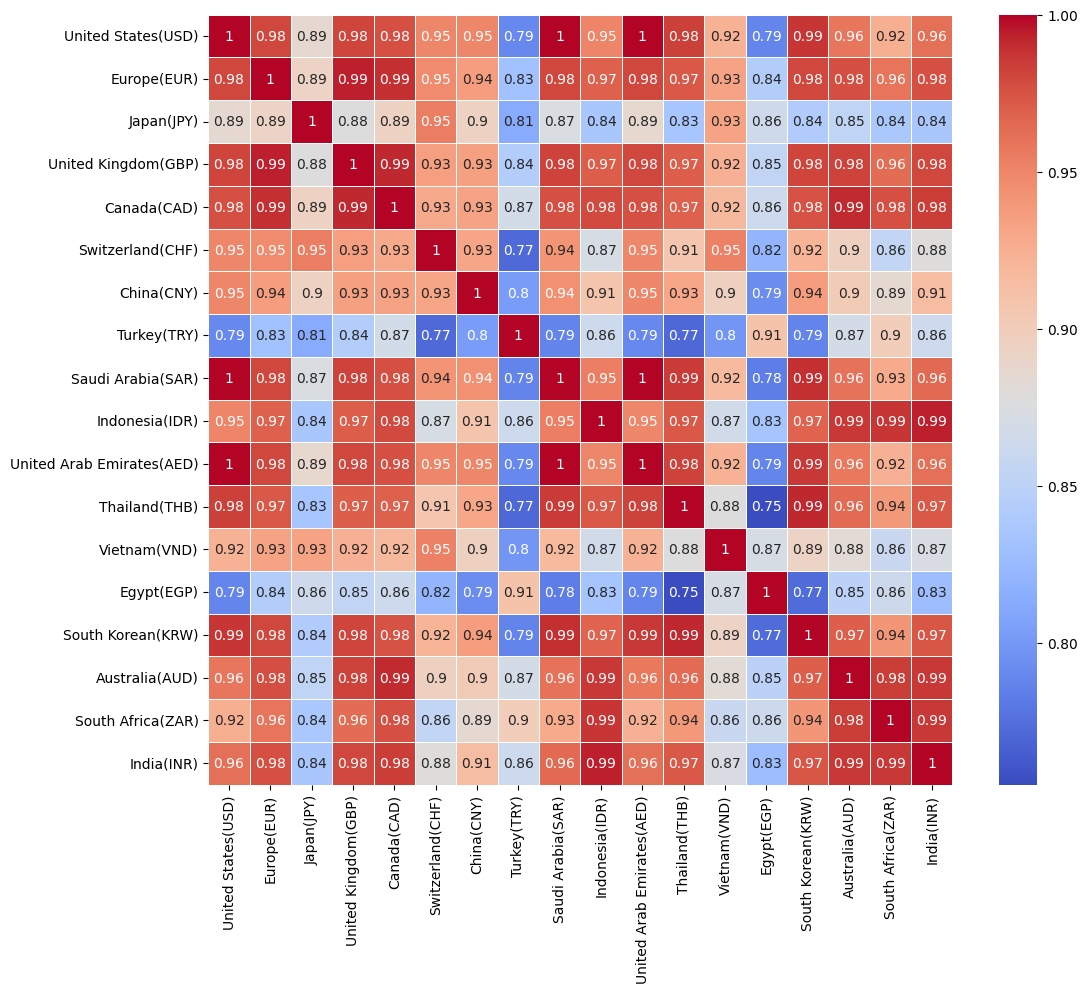

In [15]:
correlation_matrix = dataset.corr()
plt.figure(figsize = (12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

### Evaluating the performance of Multiple Linear Regression

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9944832761775805

## Support Vector Regression

### Training and evaluating the Support Vector Regression model on the whole dataset

In [21]:
from sklearn.svm import SVR
sv_reg = SVR(kernel = 'rbf')
sv_reg.fit(x, y)

y_pred = sv_reg.predict(x)

r2_score(y, y_pred)

-0.3048954165126616

## Decision Tree Regression

### Training and evaluating the decision tree regression model on the whole dataset

In [22]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(x, y)

y_pred = dt_reg.predict(x)

r2_score(y, y_pred)

1.0

## Random Forest Regression

### Training and evaluating the random forest regression model on the whole dataset

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state = 0)
rf_reg.fit(x, y)

y_pred = rf_reg.predict(x)

r2_score(y, y_pred)

0.9998190659809749

## Ridge Regression Model

### Training and evaluating the ridge regression model on the whole dataset

In [24]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1)
ridge_reg.fit(x, y)

y_pred = ridge_reg.predict(x)

r2_score(y, y_pred)

0.9971823055896374

## XGBoost

### Training and evaluating the XGBoost on the training set

In [30]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(x_train, y_train)

y_pred = xgb_reg.predict(x_test)

r2_score(y_test, y_pred)

0.9943453853481723